In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('GSE159337_rare_dis_read_count_ori.csv.gz')

In [3]:
file = data.to_csv()

In [4]:
data.dropna(inplace=True)
data

,V1,C1,C2,C3,C4,C5,C6,C7,P1,P2,P3,P4,P5,P6,P7
0,ENSG00000223972,8,5,12,10,8,8,6,12,3,9,13,7,3,2
1,ENSG00000227232,12,23,34,19,29,24,26,22,14,25,35,38,19,14
2,ENSG00000278267,2,2,1,0,0,0,1,0,5,0,1,2,1,0
3,ENSG00000243485,0,0,0,1,0,0,0,1,0,0,0,1,0,0
4,ENSG00000284332,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60618,ENSG00000271254,49,41,42,39,55,59,68,46,70,76,41,52,48,78
60619,ENSG00000275405,218,88,287,157,338,286,292,117,189,249,121,388,195,187
60620,ENSG00000275987,0,0,0,0,0,0,0,0,0,0,0,0,2,0
60621,ENSG00000277475,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [5]:
gene = data['V1']
data.drop(['V1'],axis=1,inplace=True)
colo = data.columns

In [6]:
data

,C1,C2,C3,C4,C5,C6,C7,P1,P2,P3,P4,P5,P6,P7
0,8,5,12,10,8,8,6,12,3,9,13,7,3,2
1,12,23,34,19,29,24,26,22,14,25,35,38,19,14
2,2,2,1,0,0,0,1,0,5,0,1,2,1,0
3,0,0,0,1,0,0,0,1,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60618,49,41,42,39,55,59,68,46,70,76,41,52,48,78
60619,218,88,287,157,338,286,292,117,189,249,121,388,195,187
60620,0,0,0,0,0,0,0,0,0,0,0,0,2,0
60621,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [7]:
data.sum()

C1     7761791
C2     8473880
C3    10214610
C4     9534674
C5    11657708
C6    10134547
C7    10738271
P1    10236728
P2     9901106
P3     9691956
P4     7717416
P5     9856777
P6     9325919
P7     8963707
dtype: int64

In [8]:
cpm = []
for i in range(0,len(data.columns)):
    tot = data.iloc[:,i].sum()
    count = (data.iloc[:,i]/tot)*10**6
    cpm.append(count)
    

In [9]:
cpm

[0         1.030690
 1         1.546035
 2         0.257672
 3         0.000000
 4         0.000000
            ...    
 60618     6.312976
 60619    28.086301
 60620     0.000000
 60621     0.000000
 60622     0.000000
 Name: C1, Length: 60623, dtype: float64,
 0         0.590048
 1         2.714223
 2         0.236019
 3         0.000000
 4         0.000000
            ...    
 60618     4.838398
 60619    10.384853
 60620     0.000000
 60621     0.000000
 60622     0.000000
 Name: C2, Length: 60623, dtype: float64,
 0         1.174788
 1         3.328566
 2         0.097899
 3         0.000000
 4         0.000000
            ...    
 60618     4.111758
 60619    28.097010
 60620     0.000000
 60621     0.000000
 60622     0.000000
 Name: C3, Length: 60623, dtype: float64,
 0         1.048804
 1         1.992727
 2         0.000000
 3         0.104880
 4         0.000000
            ...    
 60618     4.090334
 60619    16.466216
 60620     0.000000
 60621     0.000000
 60622     0.0

In [10]:
cpm = np.array(cpm)
cpm

array([[1.03068995, 1.54603493, 0.25767249, ..., 0.        , 0.        ,
        0.        ],
       [0.59004848, 2.714223  , 0.23601939, ..., 0.        , 0.        ,
        0.        ],
       [1.17478788, 3.32856565, 0.09789899, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.71017129, 3.85521555, 0.20290608, ..., 0.        , 0.        ,
        0.        ],
       [0.32168411, 2.03733273, 0.10722804, ..., 0.21445608, 0.        ,
        0.        ],
       [0.22312197, 1.56185382, 0.        , ..., 0.        , 0.11156099,
        0.        ]])

In [11]:
log = np.log2(cpm+1)

In [12]:
log

array([[1.02196998, 1.34825221, 0.33075628, ..., 0.        , 0.        ,
        0.        ],
       [0.66907075, 1.89306044, 0.30570138, ..., 0.        , 0.        ,
        0.        ],
       [1.12087469, 2.11388904, 0.13474533, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.77414083, 2.27953535, 0.26652401, ..., 0.        , 0.        ,
        0.        ],
       [0.40237741, 1.60280496, 0.14695238, ..., 0.28031031, 0.        ,
        0.        ],
       [0.29056828, 1.35718816, 0.        , ..., 0.        , 0.15258711,
        0.        ]])

In [13]:
log[1].max()

15.174721804393132

In [14]:
import scipy.stats as stat
z=stat.zscore(log)
z

array([[ 0.66228956, -1.25445917,  1.07808383, ..., -0.2773501 ,
        -0.40771723,         nan],
       [-0.47114012,  0.37718471,  0.92989758, ..., -0.2773501 ,
        -0.40771723,         nan],
       [ 0.97994831,  1.03854337, -0.08121549, ..., -0.2773501 ,
        -0.40771723,         nan],
       ...,
       [-0.13367965,  1.5346368 ,  0.69818451, ..., -0.2773501 ,
        -0.40771723,         nan],
       [-1.32769667, -0.49210021, -0.00901733, ...,  3.60555128,
        -0.40771723,         nan],
       [-1.6868014 , -1.22769694, -0.87816161, ..., -0.2773501 ,
         2.58121005,         nan]])

In [15]:
#Convert to dataframe
df = pd.DataFrame(z).T
df = df.dropna(axis = 0)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.662290,-0.471140,0.979948,0.703438,-0.198974,0.076107,-0.563260,0.974537,-1.393680,0.423295,1.955617,-0.133680,-1.327697,-1.686801
1,-1.254459,0.377185,1.038543,-0.556024,0.105201,-0.045423,0.022174,-0.335929,-1.484576,0.217500,2.100969,1.534637,-0.492100,-1.227697
2,1.078084,0.929898,-0.081215,-0.878162,-0.878162,-0.878162,-0.118400,-0.878162,2.609939,-0.878162,0.161498,0.698185,-0.009017,-0.878162
3,-0.521979,-0.521979,-0.521979,1.995001,-0.521979,-0.521979,-0.521979,1.830174,-0.521979,-0.521979,-0.521979,1.916598,-0.521979,-0.521979
7,-0.277350,-0.277350,-0.277350,-0.277350,-0.277350,-0.277350,3.605551,-0.277350,-0.277350,-0.277350,-0.277350,-0.277350,-0.277350,-0.277350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60617,-0.814022,-0.420982,-0.169933,0.105215,-1.002731,-0.292336,-0.617539,-1.108407,2.196897,0.452782,-0.041274,-0.419395,2.277938,-0.146214
60618,0.542411,-0.639054,-1.336374,-1.358409,-0.748460,0.177543,0.556393,-0.958396,1.059148,1.538250,-0.229304,-0.260230,-0.368868,2.025351
60619,0.729484,-1.971170,0.730544,-0.738911,0.817933,0.742719,0.639616,-1.718422,-0.336130,0.482086,-0.871725,1.672903,-0.086336,-0.092593
60620,-0.277350,-0.277350,-0.277350,-0.277350,-0.277350,-0.277350,-0.277350,-0.277350,-0.277350,-0.277350,-0.277350,-0.277350,3.605551,-0.277350


In [16]:
ar = df.values

<AxesSubplot:>

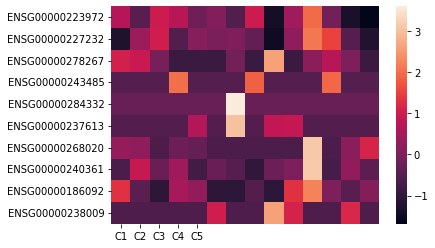

In [17]:
import seaborn as sns
sns.heatmap(ar[0:10],xticklabels = colo[0:5],yticklabels = gene[0:10])


In [18]:

var = []
for i in range(0,len(z)):
    vari = ar[:,i].var()
    var.append(vari)
    

In [19]:
var

[1.0067746920556258,
 1.5565511790079818,
 0.7320901088539339,
 0.8962388353453183,
 0.7750513901429351,
 0.6705365250817928,
 0.693776935804135,
 0.8217918228614967,
 0.8755209490508244,
 0.7865980360407258,
 1.8134127983126413,
 0.7735713653133088,
 0.9164768955550187,
 0.8833845735628354]

In [20]:
vec1 = log[0:3]
vec1
vec2 = log[4:7]
vec2

array([[0.75381095, 1.80224472, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.8394591 , 1.751951  , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.64038879, 1.77452201, 0.1284582 , ..., 0.        , 0.        ,
        0.        ]])

In [21]:
meanTum = np.mean(vec1,axis=0)
meanCont = np.mean(vec2,axis=0)

In [22]:
from scipy.stats import ttest_ind
Pvalue = ttest_ind(vec1,vec2).pvalue
Pvalue

array([0.26475477, 0.97096772, 0.04610314, ...,        nan,        nan,
              nan])

In [23]:
log2FC = meanTum - meanCont
log2FC

array([0.19275219, 0.00882799, 0.21424826, ..., 0.        , 0.        ,
       0.        ])

In [24]:
res = np.stack((meanTum,meanCont,Pvalue,log2FC),axis = 0)
res

array([[0.93730514, 1.78506723, 0.25706766, ..., 0.        , 0.        ,
        0.        ],
       [0.74455295, 1.77623924, 0.0428194 , ..., 0.        , 0.        ,
        0.        ],
       [0.26475477, 0.97096772, 0.04610314, ...,        nan,        nan,
               nan],
       [0.19275219, 0.00882799, 0.21424826, ..., 0.        , 0.        ,
        0.        ]])

In [25]:
data = pd.DataFrame(res)
data = data.T
data

,0,1,2,3
0,0.937305,0.744553,0.264755,0.192752
1,1.785067,1.776239,0.970968,0.008828
2,0.257068,0.042819,0.046103,0.214248
3,0.000000,0.000000,NaN,0.000000
4,0.000000,0.000000,NaN,0.000000
...,...,...,...,...
60618,2.589950,2.719972,0.520157,-0.130022
60619,4.411370,4.864241,0.372985,-0.452871
60620,0.000000,0.000000,NaN,0.000000
60621,0.000000,0.000000,NaN,0.000000


In [26]:
data.columns = ['meanTumor','meanControl','Pvalue','Log2FC']
data

,meanTumor,meanControl,Pvalue,Log2FC
0,0.937305,0.744553,0.264755,0.192752
1,1.785067,1.776239,0.970968,0.008828
2,0.257068,0.042819,0.046103,0.214248
3,0.000000,0.000000,NaN,0.000000
4,0.000000,0.000000,NaN,0.000000
...,...,...,...,...
60618,2.589950,2.719972,0.520157,-0.130022
60619,4.411370,4.864241,0.372985,-0.452871
60620,0.000000,0.000000,NaN,0.000000
60621,0.000000,0.000000,NaN,0.000000


In [27]:
data.to_csv('name.csv')

In [28]:
data['Pvalue'] = data['Pvalue'].fillna(1)
data

,meanTumor,meanControl,Pvalue,Log2FC
0,0.937305,0.744553,0.264755,0.192752
1,1.785067,1.776239,0.970968,0.008828
2,0.257068,0.042819,0.046103,0.214248
3,0.000000,0.000000,1.000000,0.000000
4,0.000000,0.000000,1.000000,0.000000
...,...,...,...,...
60618,2.589950,2.719972,0.520157,-0.130022
60619,4.411370,4.864241,0.372985,-0.452871
60620,0.000000,0.000000,1.000000,0.000000
60621,0.000000,0.000000,1.000000,0.000000


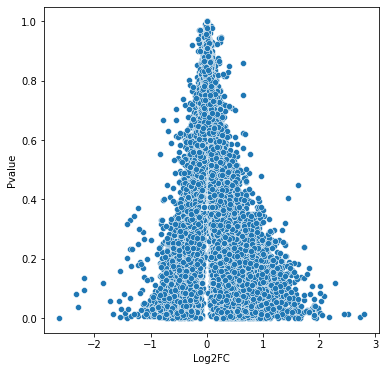

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize = (6,6))
ax = sns.scatterplot(data = data,x = 'Log2FC',y = 'Pvalue')

In [30]:
data

,meanTumor,meanControl,Pvalue,Log2FC
0,0.937305,0.744553,0.264755,0.192752
1,1.785067,1.776239,0.970968,0.008828
2,0.257068,0.042819,0.046103,0.214248
3,0.000000,0.000000,1.000000,0.000000
4,0.000000,0.000000,1.000000,0.000000
...,...,...,...,...
60618,2.589950,2.719972,0.520157,-0.130022
60619,4.411370,4.864241,0.372985,-0.452871
60620,0.000000,0.000000,1.000000,0.000000
60621,0.000000,0.000000,1.000000,0.000000


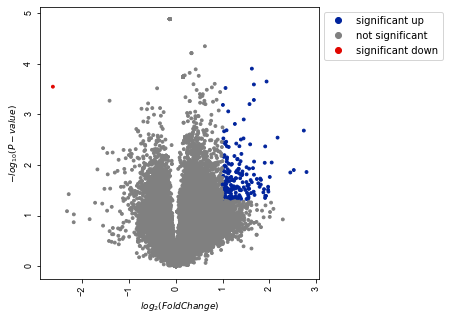

In [31]:
from bioinfokit import visuz,analys
visuz.GeneExpression.volcano(data, lfc='Log2FC', pv='Pvalue', lfc_thr=(1, 2), pv_thr=(0.05, 0.01), 
    color=("#00239CFF", "grey", "#E10600FF"), plotlegend=True, legendpos='upper right', 
    legendanchor=(1.46,1),show = True)

In [32]:
#Creating a function to calculate the log value from the csv file
import numpy as np

def lg(var):
    try:
        data = pd.read_csv(var)
        data.dropna(inplace = True)
        numerics = ['int16', 'int32', 'int64']
        data = data.select_dtypes(include=numerics)
        cpm = []
        for i in range(0,len(data.columns)):
            tot = data.iloc[:,i].sum()
            count = (data.iloc[:,i]/tot)*10**6
            cpm.append(count)
        cpm = np.array(cpm)
        log = np.log2(cpm+1)
        return log
    except:
        print("Enter the correct csv file")
    

    

In [33]:
#Using the function
l = lg('GSE159337_rare_dis_read_count_ori.csv.gz')  
ld = pd.DataFrame(l).T
l

array([[1.02196998, 1.34825221, 0.33075628, ..., 0.        , 0.        ,
        0.        ],
       [0.66907075, 1.89306044, 0.30570138, ..., 0.        , 0.        ,
        0.        ],
       [1.12087469, 2.11388904, 0.13474533, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.77414083, 2.27953535, 0.26652401, ..., 0.        , 0.        ,
        0.        ],
       [0.40237741, 1.60280496, 0.14695238, ..., 0.28031031, 0.        ,
        0.        ],
       [0.29056828, 1.35718816, 0.        , ..., 0.        , 0.15258711,
        0.        ]])

In [34]:
#Convert the log values into an RDS files
import pyreadr as prd
prd.write_rds("test.Rds", ld)


In [35]:
s = prd.read_r('test.Rds')
s

OrderedDict([(None,
                               0         1         2         3         4         5  \
              rownames                                                               
              1         1.021970  0.669071  1.120875  1.034782  0.753811  0.839459   
              2         1.348252  1.893060  2.113889  1.581461  1.802245  1.751951   
              3         0.330756  0.305701  0.134745  0.000000  0.000000  0.000000   
              4         0.000000  0.000000  0.000000  0.143890  0.000000  0.000000   
              5         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
              ...            ...       ...       ...       ...       ...       ...   
              60619     2.870459  2.545572  2.353819  2.347760  2.515488  2.770125   
              60620     4.862268  3.509044  4.862799  4.126495  4.906587  4.868899   
              60621     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
              60622     0.000000  